In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
def showImg(img, title = ''):
    plt.figure(figsize = (20,15));
    plt.title(title)
    plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

def showGrayImg(img, title = ''):
    plt.figure(figsize = (20,15));
    plt.title(title)
    plt.imshow(img, cmap='gray')

all_contours = -1
green = (0,255,0)
thickness = 2

# Meme Creator

1. Create a basic Meme creator with one image and a short line of text
1. Use the classic meme font

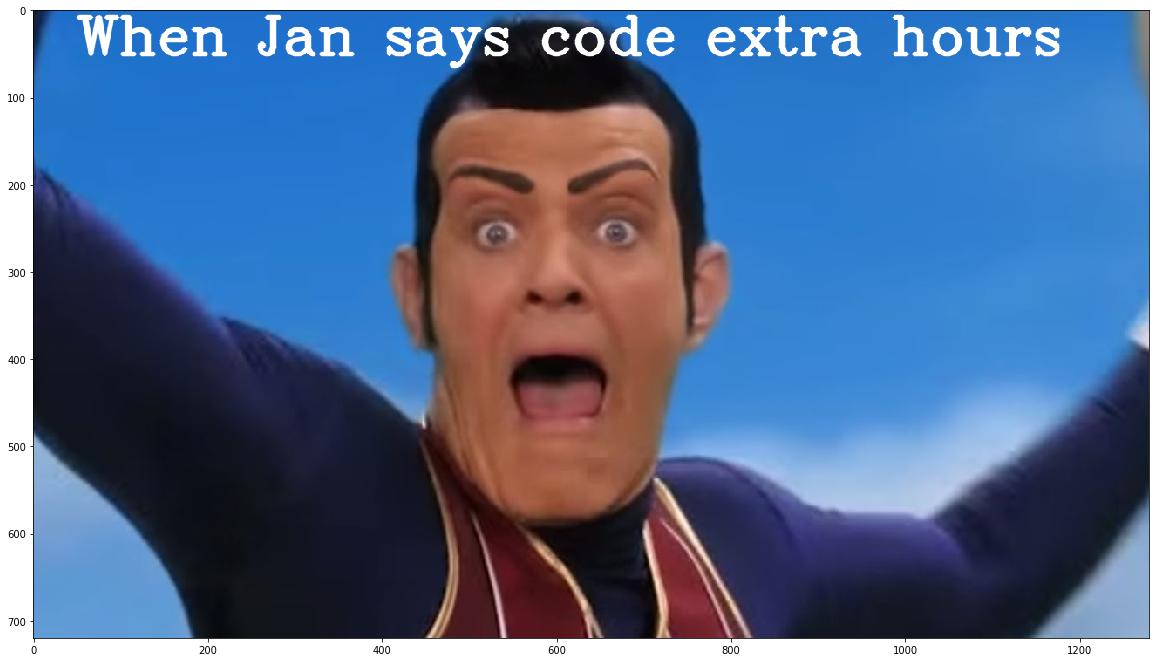

In [15]:
meme =cv2.imread('meme.jpg')
x = 50
font = cv2.FONT_HERSHEY_COMPLEX
cv2.putText(meme , 'When Jan says code extra hours' , (x,50) , font , 2 , (255,255,255), 4, cv2.LINE_AA)
#plt.figure(figsize = (20,15))
plt.figure(figsize = (20,15))
plt.imshow(cv2.cvtColor(meme, cv2.COLOR_BGR2RGB))


# Ball Tracker

1. Given an image with a ball on it isolate the ball

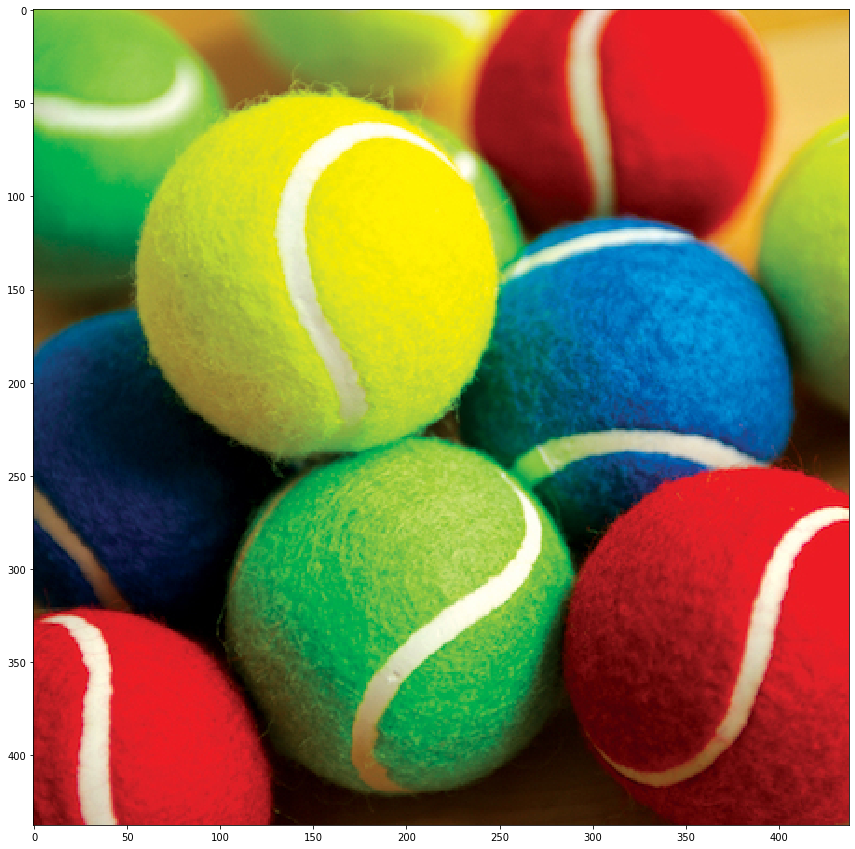

In [103]:
ball = cv2.imread('ball.jpg')
grayball = cv2.imread('ball.jpg' , 0)
balls = cv2.imread('balls.jpg')
grayballs = cv2.imread('balls.jpg' , 0)
showImg(balls)

In [137]:
hsv_ball = cv2.cvtColor(ball, cv2.COLOR_BGR2HSV)
ylowerRange = (30,0,0)
yupperRange = (85,400,255)

In [79]:
masked_img = ball.copy()

ymask = cv2.inRange(hsv_ball, ylowerRange, yupperRange)

masked_img[mask == 0] = [0,0,0]

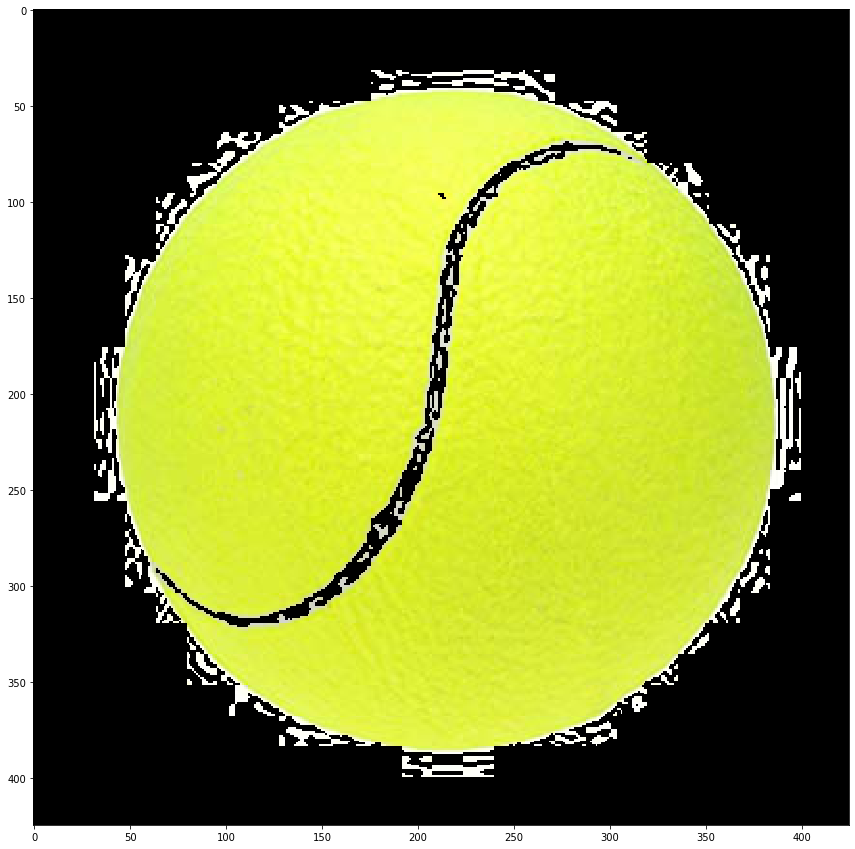

In [138]:
plt.figure(figsize=(20,15))
plt.imshow(cv2.cvtColor(masked_img,cv2.COLOR_BGR2RGB))

In [99]:
hsv_balls = cv2.cvtColor(balls, cv2.COLOR_BGR2HSV)
ylowerRange = (30,0,0)
yupperRange = (35,255,255)

In [93]:
masked_img = ball.copy()
mask = cv2.inRange(hsv_ball, ylowerRange, yupperRange)
masked_img[mask == 0] = [0,0,0]

In [100]:
masked = balls.copy()
yellow_mask = cv2.inRange(hsv_balls, ylowerRange, yupperRange )
masked[yellow_mask == 0] = [0,0,0]

In [102]:
# plt.figure(figsize=(20,15))
# plt.imshow(cv2.cvtColor(masked,cv2.COLOR_BGR2RGB))

In [115]:
green_lRange = (40,0,20)
green_uRange = (80, 350, 255)

In [116]:
greenmasked = balls.copy()
green_mask = cv2.inRange(hsv_balls, green_lRange, green_uRange)
greenmasked[green_mask == 0] = [0,0,0]

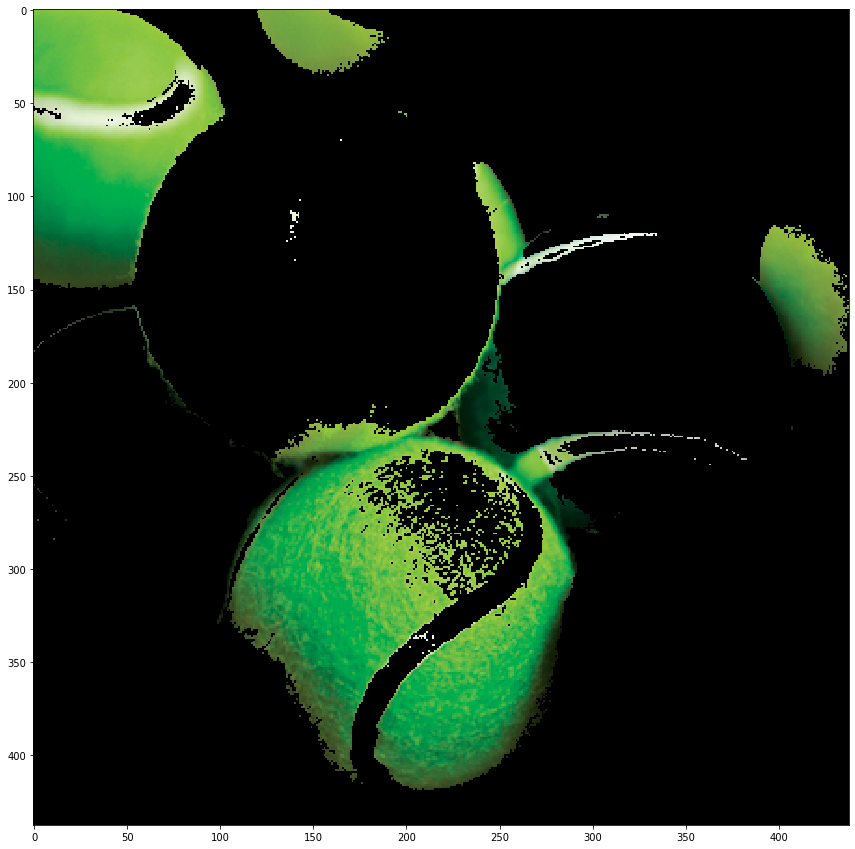

In [120]:
plt.figure(figsize=(20,15))
plt.imshow(cv2.cvtColor(greenmasked,cv2.COLOR_BGR2RGB))

In [118]:
blue_lRange = (95,0,20)
blue_uRange = (145, 350, 255)

In [119]:
bluemasked = balls.copy()
blue_mask = cv2.inRange(hsv_balls, blue_lRange, blue_uRange)
bluemasked[blue_mask == 0] = [0,0,0]

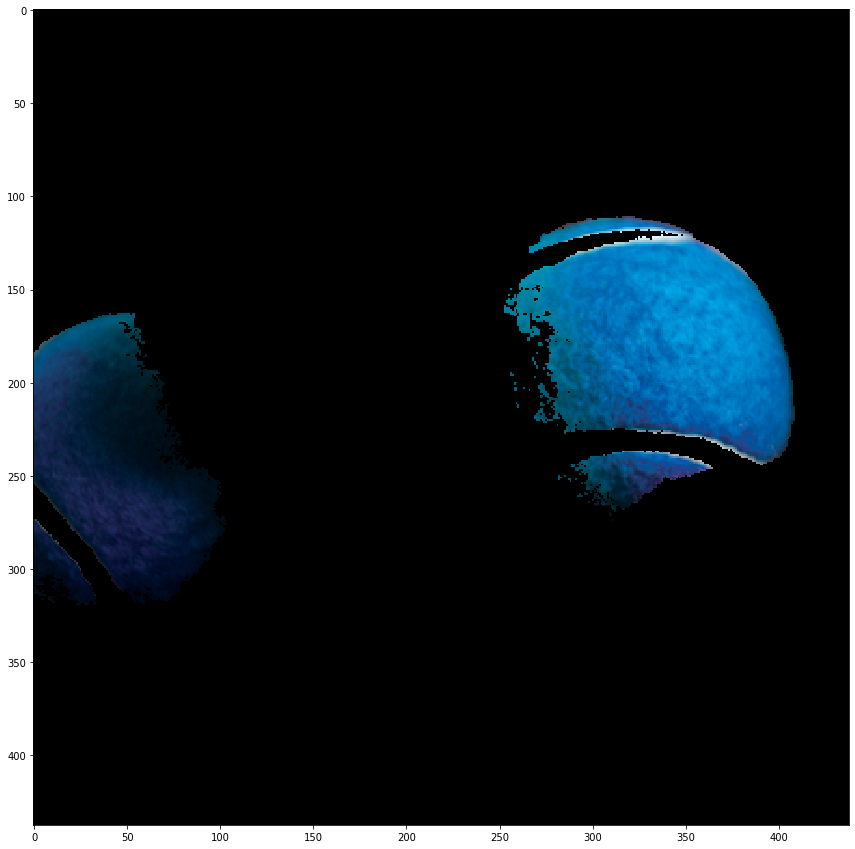

In [121]:
plt.figure(figsize=(20,15))
plt.imshow(cv2.cvtColor(bluemasked,cv2.COLOR_BGR2RGB))

In [126]:
cap = cv2.VideoCapture(0)

blue_lRange = (95,0,20)
blue_uRange = (145, 350, 255)

while(True):
    # Capture frame-by-frame
    ret, frame = cap.read()

    # Our operations on the frame come here
    bluemasked = np.copy(frame)
    #img = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    hsv_balls = cv2.cvtColor(bluemasked, cv2.COLOR_BGR2HSV)
    blue_mask = cv2.inRange(hsv_balls, blue_lRange, blue_uRange)
    bluemasked[blue_mask == 0] = [0,0,0]
    
    
    # Display the resulting frame
    cv2.imshow('Video from OpenCV!, press \'q\' to close',bluemasked)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

TypeError: src data type = 17 is not supported

In [128]:
cap = cv2.VideoCapture(0)
blue_lRange = (95,0,20)
blue_uRange = (145, 350, 255)
while(True):
    # Capture frame-by-frame
    ret, frame = cap.read()
    # Our operations on the frame come here
    bluemasked = np.copy(frame)
    #img = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    bluemasked = cv2.cvtColor(bluemasked, cv2.COLOR_BGR2HSV)
    blue_mask = cv2.inRange(bluemasked, blue_lRange, blue_uRange)
    bluemasked[blue_mask == 0] = [0,0,0]
    # Display the resulting frame
    cv2.imshow('Video from OpenCV!, press \'q\' to close',bluemasked)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

TypeError: src data type = 17 is not supported

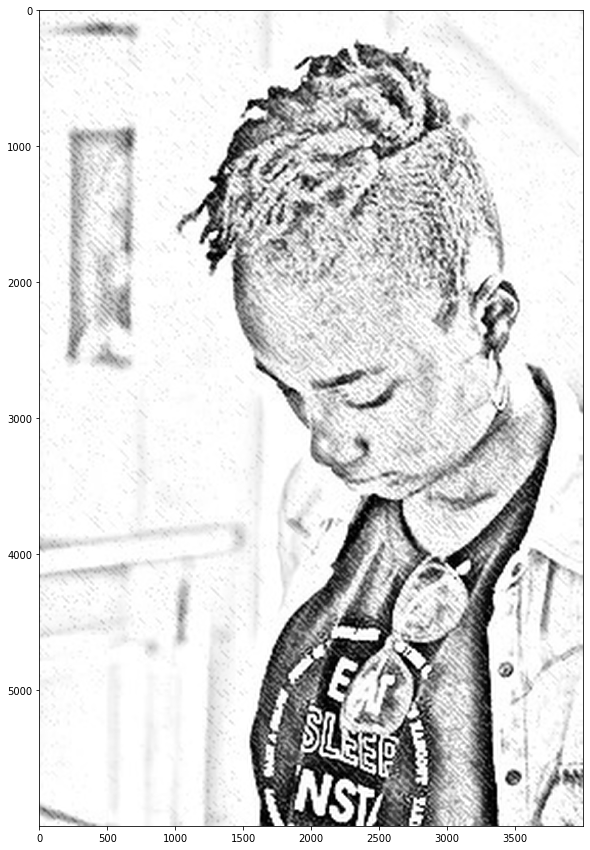

In [129]:
book = cv2.imread('wendy.jpg')
grayBook = cv2.imread('wendy.jpg' , 0)
showGrayImg(book)

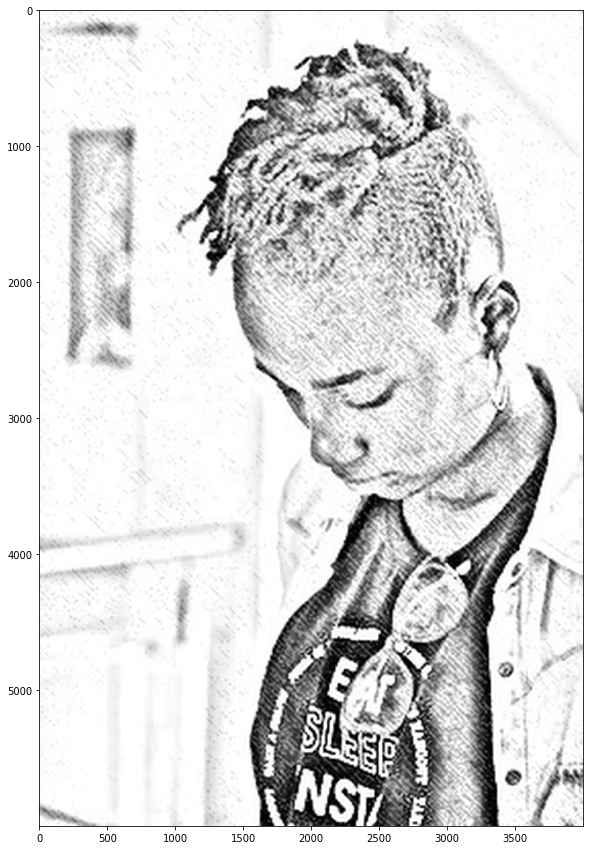

In [130]:
gaussianBlur = cv2.GaussianBlur(grayBook, (7,7),-1)
showGrayImg(gaussianBlur)



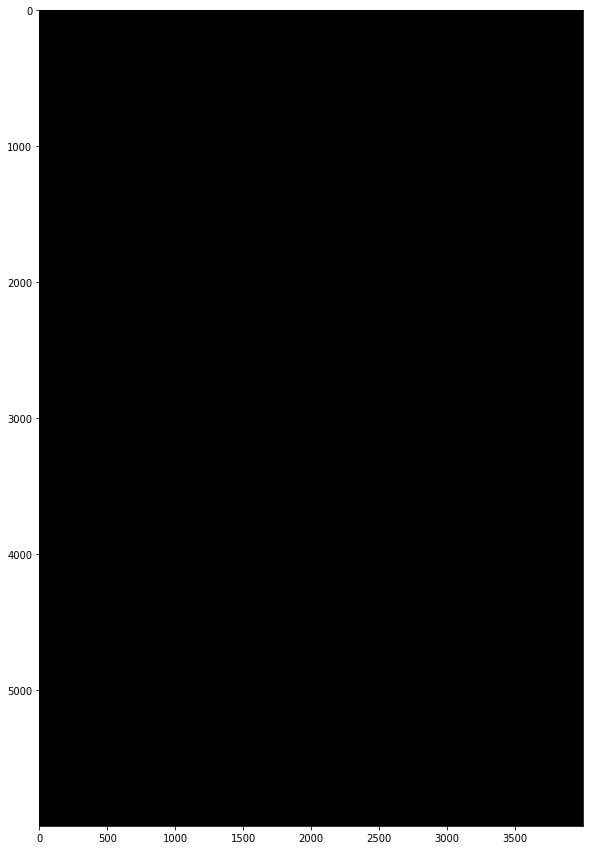

In [136]:
book_edges = cv2.Canny(grayBook,220,255)
showGrayImg(book_edges)

# cv2.Canny(grayscale_bcn,220,255)
# showGrayScaleImg(edges)

In [132]:
bookcopy = grayBook.copy()
book_contour= cv2.findContours(book_edges,cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
cv2.drawContours(bookcopy,book_contour[1],-1, (0,255,0),1)


array([[250, 250, 250, ..., 217, 217, 217],
       [250, 250, 250, ..., 217, 217, 217],
       [250, 250, 250, ..., 217, 217, 217],
       ...,
       [234, 234, 235, ..., 254, 253, 253],
       [234, 234, 235, ..., 254, 253, 253],
       [233, 234, 235, ..., 254, 253, 253]], dtype=uint8)

1. Book cover extractor
2. From a given picture detect the book on the image and draw a box around it
3. Crop the book from the picture
4. Transform the book perspective to show it as a 2D image (to see the proper book cover)
5. If there is more than a book in the image make sure all books are extracted

## Cars Detector

1. Create a classifier to detect cars in an image
1. If at least one car was detected write Car Detected (in Green) on top of the image, otherwise write No car detected (in Red)
1. Save the image to disk
1. Show the image result inside the notebook

In [135]:
image = cv2.imread('img/car1.jpg')
#image = cv2.imread('img/WaldoScene1.jpg')

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Load Template image
template = cv2.imread('img/car.jpg',0)

result = cv2.matchTemplate(gray, template, cv2.TM_CCOEFF)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

#Create Bounding Box
top_left = max_loc
bottom_right = (top_left[0] + 50, top_left[1] + 50)
cv2.rectangle(image, top_left, bottom_right, (0,255,0), 3)
showImg(image)

error: OpenCV(3.4.2) c:\miniconda3\conda-bld\opencv-suite_1534379934306\work\modules\imgproc\src\color.hpp:253: error: (-215:Assertion failed) VScn::contains(scn) && VDcn::contains(dcn) && VDepth::contains(depth) in function 'cv::CvtHelper<struct cv::Set<3,4,-1>,struct cv::Set<1,-1,-1>,struct cv::Set<0,2,5>,2>::CvtHelper'
